# Introduction to Linear Regression



In [1]:
# this allows plots to appear directly in the notebook
#%matplotlib inline

# Import the libraries required
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import math

In [2]:
# Read in data
house_data = pd.read_csv("chicagohouseprices2.csv", index_col=0)
house_data

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
0,"2111 W Division St #5, Chicago IL",Wicker Park,Condo,390000,NaN,2.59,9,3.91,0,0,0,36.2,335790.0
1,"1520 W Walton St #2, Chicago IL",Wicker Park,Condo,320500,NaN,4.10,7,3.02,0,0,0,91.7,376908.0
2,"2047 W Thomas St, Chicago IL",Wicker Park,Multi-Family Home,620000,4.0,2.09,9,3.84,94,3049,3492,36.2,629300.0
3,"1735 N Paulina St #314, Chicago IL",Wicker Park,Condo,318000,NaN,2.40,9,2.90,0,0,0,50.0,297330.0
4,"1634 W Beach Ave, Chicago IL",Wicker Park,Multi-Family Home,477000,2.0,4.63,9,2.96,31,2614,1840,78.9,463644.0
5,"1634 W Wabansia Ave, Chicago IL",Wicker Park,Single-Family Home,695000,2.0,1.40,8,2.86,23,2614,1628,50.0,813150.0
6,"1440 N Wood St #2F, Chicago IL",Wicker Park,Condo,242500,NaN,5.38,9,3.22,0,0,0,69.4,196667.5
7,"1137 N Wood St #F2, Chicago IL",Wicker Park,Condo,477500,NaN,4.18,8,3.39,0,0,0,59.5,445030.0
8,"1418 N Bell Ave, Chicago IL",Wicker Park,Multi-Family Home,466000,2.0,4.93,10,4.02,121,3049,1344,16.7,538696.0
9,"1308 N Bosworth Ave, Chicago IL",Wicker Park,Multi-Family Home,435000,2.0,4.75,8,2.89,119,3485,1760,40.0,463275.0


In [9]:
# Summarise the data
house_data.fillna(0,inplace=True)
house_data.describe()

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
count,2.190000e+02,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,2.190000e+02
mean,4.834311e+05,0.726027,4.663607,9.698630,3.420411,29.424658,873.200913,699.977169,49.197717,4.862191e+05
std,4.001249e+05,1.172235,1.418146,2.898995,0.352522,49.155880,1392.893683,1175.278922,18.554525,3.978582e+05
min,2.450000e+04,0.000000,1.090000,6.000000,2.770000,0.000000,0.000000,0.000000,16.700000,2.883650e+04
25%,3.190000e+05,0.000000,3.940000,8.000000,3.150000,0.000000,0.000000,0.000000,36.100000,3.074488e+05
50%,3.900000e+05,0.000000,4.930000,9.000000,3.400000,0.000000,0.000000,0.000000,50.000000,3.919800e+05
75%,5.125000e+05,2.000000,5.580000,10.000000,3.685000,41.000000,2614.000000,1344.000000,59.500000,5.324750e+05
max,3.686000e+06,4.000000,8.080000,22.000000,4.200000,131.000000,7405.000000,6422.000000,93.900000,3.973508e+06


In [10]:
# Look for any linear correlations in the data - the bigger the number the better ordinary least squares will do
house_data.corr()

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
Price,1.000000,0.430813,0.118667,-0.034644,-0.072433,0.237720,0.443341,0.456272,-0.072403,0.983784
Bath,0.430813,1.000000,0.091518,-0.023058,-0.073101,0.612537,0.825174,0.934312,-0.078990,0.438263
CrimeIndex,0.118667,0.091518,1.000000,0.194745,0.102382,-0.036644,-0.008807,0.070952,-0.100256,0.122793
MinutesToLoop,-0.034644,-0.023058,0.194745,1.000000,0.374829,-0.023820,-0.053292,-0.032437,-0.196728,-0.034185
MilesToLake,-0.072433,-0.073101,0.102382,0.374829,1.000000,-0.047087,0.006240,-0.046517,-0.205966,-0.082604
Age,0.237720,0.612537,-0.036644,-0.023820,-0.047087,1.000000,0.716774,0.645147,-0.029953,0.255628
LotSizeSqft,0.443341,0.825174,-0.008807,-0.053292,0.006240,0.716774,1.000000,0.828598,-0.055458,0.454939
HouseSizeSqft,0.456272,0.934312,0.070952,-0.032437,-0.046517,0.645147,0.828598,1.000000,-0.023378,0.471783
SchoolIndex,-0.072403,-0.078990,-0.100256,-0.196728,-0.205966,-0.029953,-0.055458,-0.023378,1.000000,-0.073825
EstimatedPrice,0.983784,0.438263,0.122793,-0.034185,-0.082604,0.255628,0.454939,0.471783,-0.073825,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73bd61a350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f73b82fe990>]], dtype=object)

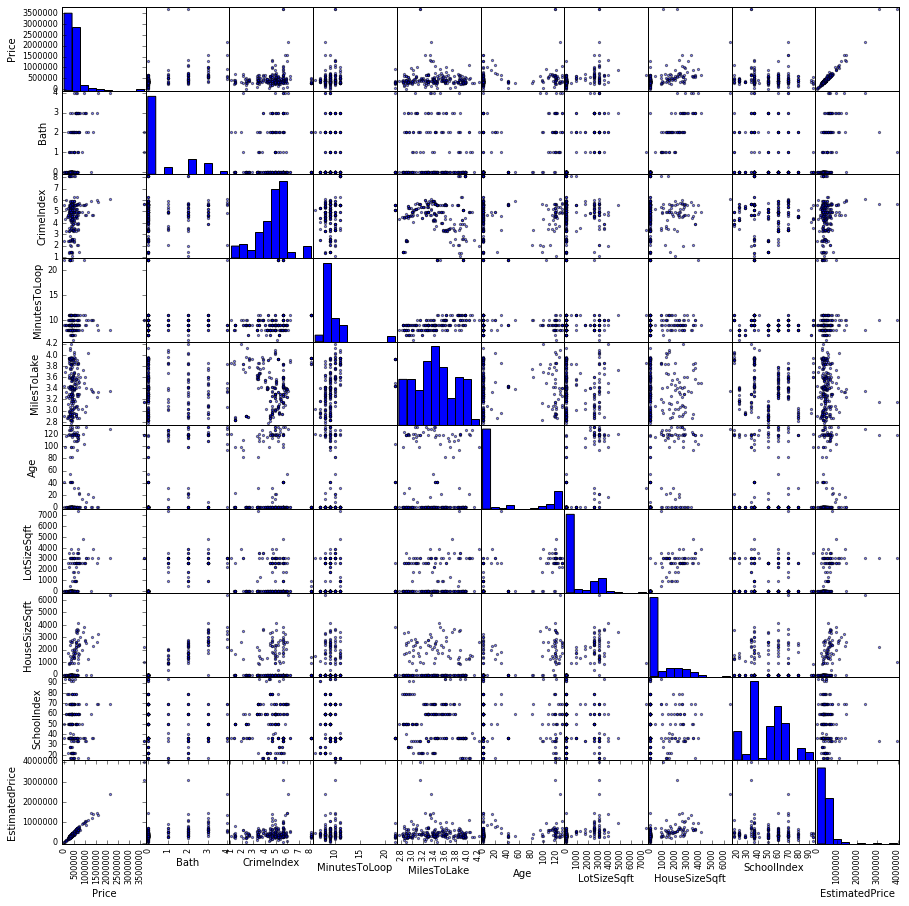

In [11]:
pd.scatter_matrix(house_data, figsize=(15,15))

### Questions?

- Can you describe the data set - give a summary of what's happening?
- What looks to be affecting house prices from our initial inspection?
- What is the type of relationship in those variables affecting price?

In [15]:
# create a dataframe with just the estimated price column in it
df = house_data[['Price','EstimatedPrice']]

In [19]:
# create a RANSAC regressor
ransac = lm.RANSACRegressor()

In [21]:
# use the RANSAC regressor to find how much of the Price is related to the EstimatedPrice 
ransac.fit(df[['Price']],df['EstimatedPrice'])

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [27]:
# use that regression to predict Price based on EstimatedPrice
df.loc[:,'PredictedPrice']=ransac.predict(df[['EstimatedPrice']])
df

,Price,EstimatedPrice,PredictedPrice
0,390000,335790.0,3.356746e+05
1,320500,376908.0,3.750360e+05
2,620000,629300.0,6.166457e+05
3,318000,297330.0,2.988576e+05
4,477000,463644.0,4.580666e+05
5,695000,813150.0,7.926415e+05
6,242500,196667.5,2.024955e+05
7,477500,445030.0,4.402478e+05
8,466000,538696.0,5.299123e+05
9,435000,463275.0,4.577134e+05


In [31]:
# create a RANSAC regressor
ransac2 = lm.RANSACRegressor()
ransac2.fit(df[['Price']],df['PredictedPrice'])
df.loc[:,'PredictedPrice2']=ransac2.predict(df[['PredictedPrice']])
df

,Price,EstimatedPrice,PredictedPrice,PredictedPrice2
0,390000,335790.0,3.356746e+05,3.376165e+05
1,320500,376908.0,3.750360e+05,3.801976e+05
2,620000,629300.0,6.166457e+05,6.415703e+05
3,318000,297330.0,2.988576e+05,2.977880e+05
4,477000,463644.0,4.580666e+05,4.700199e+05
5,695000,813150.0,7.926415e+05,8.319622e+05
6,242500,196667.5,2.024955e+05,1.935437e+05
7,477500,445030.0,4.402478e+05,4.507436e+05
8,466000,538696.0,5.299123e+05,5.477424e+05
9,435000,463275.0,4.577134e+05,4.696378e+05


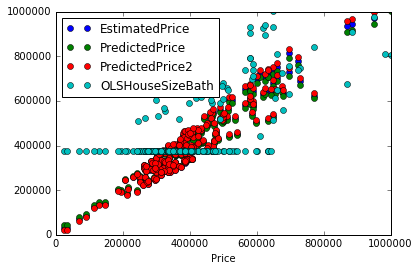

In [163]:
# draw a scatter plot of Price / EstimatedPrice and overlay the RANSAC prediction on it

#df.plot.scatter('Price','PredictedPrice')
#df.plot.scatter('Price','EstimatedPrice')
df.plot(x='Price',xlim=[0,1000000],ylim=[0,1000000],style='o')

In [63]:
# RANSAC has an attribute called 'estimator'. What type is it?
type(ransac.estimator_)

sklearn.linear_model.base.LinearRegression

In [69]:
# What is the coefficient (gradient) and y-intercept as reported by this estimator (hint: coef_ and intercept_)
zip(['Coef: ','Intercept: '],[ransac.estimator_.coef_[0],ransac.estimator_.intercept_])

[('Coef: ', 0.95727943095499246), ('Intercept: ', 14229.729435800167)]

In [75]:
# Create a new data frame with two columns: HouseSizeSqft and Bath
df2 = house_data[['Price','HouseSizeSqft','Bath']]

In [161]:
# Regress Price against these values
ols = lm.LinearRegression()
ols.fit(df2[['HouseSizeSqft','Bath']],df2[['Price']])
df.loc[:,'OLSHouseSizeBath']=ols.predict(house_data[['HouseSizeSqft','Bath']])
df

,Price,EstimatedPrice,PredictedPrice,PredictedPrice2,OLSHouseSizeBath
0,390000,335790.0,3.356746e+05,3.376165e+05,373804.129563
1,320500,376908.0,3.750360e+05,3.801976e+05,373804.129563
2,620000,629300.0,6.166457e+05,6.415703e+05,925286.249042
3,318000,297330.0,2.988576e+05,2.977880e+05,373804.129563
4,477000,463644.0,4.580666e+05,4.700199e+05,663085.143015
5,695000,813150.0,7.926415e+05,8.319622e+05,632548.226131
6,242500,196667.5,2.024955e+05,1.935437e+05,373804.129563
7,477500,445030.0,4.402478e+05,4.507436e+05,373804.129563
8,466000,538696.0,5.299123e+05,5.477424e+05,591640.280872
9,435000,463275.0,4.577134e+05,4.696378e+05,651561.778153


In [157]:
# What would you expect a house price to be for a house with 3 bathrooms and 3500 sqft?
ols.predict([[3500,3]])

array([[ 914316.77471187]])

In [183]:
# Can you find any houses in the data set which are similar to this?
def hdist(sqft,baths):
    return math.sqrt((3500-sqft)**2 + (baths-3)**2*50000)

house_data[house_data.apply(lambda x:hdist(x['HouseSizeSqft'], x['Bath']),axis=1)<300].sort_values(by='hdist')

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice,hdist
19,"2152 W Caton St, Chicago IL",Wicker Park,Single-Family Home,885000,3.0,5.58,11,3.72,121,4792,3461,36.1,945180.0,39.00000
165,"1634 W Julian St, Chicago IL",Wicker Park,Multi-Family Home,581000,3.0,4.63,9,2.94,121,2614,3432,50.0,611212.0,68.00000
2,"2047 W Thomas St, Chicago IL",Wicker Park,Multi-Family Home,620000,4.0,2.09,9,3.84,94,3049,3492,36.2,629300.0,100.31949
203,"1928 W Crystal St, Chicago IL",Wicker Park,Multi-Family Home,580000,3.0,4.99,9,3.56,119,3049,3612,59.5,657140.0,112.00000
13,"2116 W Potomac Ave, Chicago IL",Wicker Park,Multi-Family Home,650000,3.0,3.89,10,3.86,119,3485,3618,16.7,680550.0,118.00000
167,"1614 W Pierce Ave, Chicago IL",Wicker Park,Multi-Family Home,625000,3.0,4.43,8,2.87,123,2614,3360,50.0,705625.0,140.00000
190,"1422 N Hoyne Ave #1, Chicago IL",Wicker Park,Multi-Family Home,624000,3.0,3.89,10,3.76,109,3485,3663,69.4,643344.0,163.00000


In [172]:
# Try selecting different variables or combinations of variables or another regressor.

pd.concat([house_data,pd.get_dummies(house_data['HouseType'])],axis=1)

#ols2 = lm.LinearRegression()
#ols2.fit(house_data[['HouseSizeSqft','Bath','Age','CrimeIndex']],df2[['Price']])
#ols.predict([[3500,3,5]])

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice,hdist,0,Condo,Lot/Land,Multi-Family Home,Single-Family Home,Townhome
0,"2111 W Division St #5, Chicago IL",Wicker Park,Condo,390000,0.0,2.59,9,3.91,0,0,0,36.2,335790.0,3512.833614,0.0,1.0,0.0,0.0,0.0,0.0
1,"1520 W Walton St #2, Chicago IL",Wicker Park,Condo,320500,0.0,4.10,7,3.02,0,0,0,91.7,376908.0,3512.833614,0.0,1.0,0.0,0.0,0.0,0.0
2,"2047 W Thomas St, Chicago IL",Wicker Park,Multi-Family Home,620000,4.0,2.09,9,3.84,94,3049,3492,36.2,629300.0,100.319490,0.0,0.0,0.0,1.0,0.0,0.0
3,"1735 N Paulina St #314, Chicago IL",Wicker Park,Condo,318000,0.0,2.40,9,2.90,0,0,0,50.0,297330.0,3512.833614,0.0,1.0,0.0,0.0,0.0,0.0
4,"1634 W Beach Ave, Chicago IL",Wicker Park,Multi-Family Home,477000,2.0,4.63,9,2.96,31,2614,1840,78.9,463644.0,1663.009320,0.0,0.0,0.0,1.0,0.0,0.0
5,"1634 W Wabansia Ave, Chicago IL",Wicker Park,Single-Family Home,695000,2.0,1.40,8,2.86,23,2614,1628,50.0,813150.0,1874.669037,0.0,0.0,0.0,0.0,1.0,0.0
6,"1440 N Wood St #2F, Chicago IL",Wicker Park,Condo,242500,0.0,5.38,9,3.22,0,0,0,69.4,196667.5,3512.833614,0.0,1.0,0.0,0.0,0.0,0.0
7,"1137 N Wood St #F2, Chicago IL",Wicker Park,Condo,477500,0.0,4.18,8,3.39,0,0,0,59.5,445030.0,3512.833614,0.0,1.0,0.0,0.0,0.0,0.0
8,"1418 N Bell Ave, Chicago IL",Wicker Park,Multi-Family Home,466000,2.0,4.93,10,4.02,121,3049,1344,16.7,538696.0,2158.317864,0.0,0.0,0.0,1.0,0.0,0.0
9,"1308 N Bosworth Ave, Chicago IL",Wicker Park,Multi-Family Home,435000,2.0,4.75,8,2.89,119,3485,1760,40.0,463275.0,1742.871194,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
#(Optional) Can you make a 3D plot to show whether they are effective?
import mpl_toolkits.mplot3d as m3
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.scatter(house_data.Bath,house_data.HouseSizeSqft,house_data.Price)
plt.show()